In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mars-landmark-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4156397%2F7188920%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240720%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240720T010133Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2d481f8e2278b601dbad370ed52e2d3b622e9eb2cae5f57449b31c1cd56073d53e3bef060586ba37beff7ffda6f208a42ea7d9f359ba84454c38ec28da0d0ae4f0af9a38b704c557b72dbb88f1412d75d6b1f1192ad1a07937ada3c3746bb33f85bd706285989f5ea191e34d592c0ae3ecc64ecf2c943ea69c06a8a3e154c0bf100846137b3557056bc57bc6832fca9d7440f63a2326d38004fde249a7f0d7e3d1ae7b041070e134180c4596251640c91327a731525325708dec0579b072fbb608aff769a89a2e14905aa75bd7d3ce14f8310a4d5d8ede8afb6ef8754fd96c1801b304ea432c44b8f95eef0d0b52840fa94bd41f9a70c7b8071d5e46ce65a0b9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mars-landmark-detection/sample_submission.csv
/kaggle/input/mars-landmark-detection/train.csv
/kaggle/input/mars-landmark-detection/test.csv
/kaggle/input/mars-landmark-detection/test/1269.jpg
/kaggle/input/mars-landmark-detection/test/623.jpg
/kaggle/input/mars-landmark-detection/test/2193.jpg
/kaggle/input/mars-landmark-detection/test/2008.jpg
/kaggle/input/mars-landmark-detection/test/2081.jpg
/kaggle/input/mars-landmark-detection/test/764.jpg
/kaggle/input/mars-landmark-detection/test/1700.jpg
/kaggle/input/mars-landmark-detection/test/1786.jpg
/kaggle/input/mars-landmark-detection/test/1075.jpg
/kaggle/input/mars-landmark-detection/test/771.jpg
/kaggle/input/mars-landmark-detection/test/208.jpg
/kaggle/input/mars-landmark-detection/test/2628.jpg
/kaggle/input/mars-landmark-detection/test/820.jpg
/kaggle/input/mars-landmark-detection/test/1789.jpg
/kaggle/input/mars-landmark-detection/test/473.jpg
/kaggle/input/mars-landmark-detection/test/1792.jpg
/kaggle/input/mars-

Load in more dependencies

In [2]:
from PIL import Image
import tensorflow as tf

2024-07-21 20:11:57.511014: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 20:11:57.511123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 20:11:57.636318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Load in data and import numpy representations into the training and testing dataframes**

In [3]:
train_df = pd.read_csv("/kaggle/input/mars-landmark-detection/train.csv")
#test_df = pd.read_csv("/kaggle/input/mars-landmark-detection/test.csv")

In [4]:
train_df.head(5)

,FileName,Class
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0


In [5]:
train_image_directory = '/kaggle/input/mars-landmark-detection/train'
#test_image_directory = '/kaggle/input/mars-landmark-detection/test'

train_df['np_img'] = None
#test_df['np_img'] = None


def aggregate(image_directory):
    image_arrays = []
    file_names = []
    for filename in os.listdir(image_directory):
        file_path = os.path.join(image_directory, filename)
        if os.path.isfile(file_path) and filename.lower().endswith('.jpg'):
            print(f'Processing file: {file_path}')
            # Open the image
            with Image.open(file_path) as img:
                resized_img = img.resize((224, 224))
                # Convert the image to a NumPy array
                img_array = np.array(resized_img)
                # Append the image array and file name to the lists
                image_arrays.append(img_array)
                file_names.append(filename)
    image_dict = {file_names[i]: image_arrays[i] for i in range(len(file_names))}
    return image_dict

In [6]:
train_df.head(1)

,FileName,Class,np_img
0,1.jpg,0,None


Creating dictionary of image file names and their corresponding numpy arrays

In [7]:
train_image_dict = aggregate(train_image_directory)
#test_image_dict = aggregate(test_image_directory)

Processing file: /kaggle/input/mars-landmark-detection/train/7981.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6234.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/1269.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/3863.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6241.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/623.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2193.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/3750.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2008.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/5982.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/7737.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/2081.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/6588.jpg
Processing file: /kaggle/input/mars-landmark-detection/train/7966.jpg
Processing file: /kag

In [9]:
train_image_dict['7981.jpg']

array([[106, 106, 105, ..., 125, 125, 124],
       [106, 106, 106, ..., 126, 125, 125],
       [106, 106, 106, ..., 127, 127, 126],
       ...,
       [131, 130, 130, ..., 111, 112, 112],
       [131, 131, 130, ..., 111, 112, 112],
       [131, 131, 130, ..., 111, 112, 112]], dtype=uint8)

In [8]:
for i, row in train_df.iterrows():
    filename = row['FileName']
    if filename in train_image_dict:
        train_df.at[i, 'np_img'] = train_image_dict[filename]
#for j, row in test_df.iterrows():
#    filename = row['FileName']
#    if filename in test_image_dict:
#        test_df.at[j, 'np_img'] = test_image_dict[filename]

In [10]:
#test_df['np_img'].iloc[2692]

In [11]:
train_df.head(3).iloc[0]['np_img'].shape

(224, 224)

In [12]:
count_1 = (train_df['Class'] == 0).sum()
count_2 = (train_df['Class'] == 1).sum()
count_3 = (train_df['Class'] == 2).sum()
count_4 = (train_df['Class'] == 3).sum()
count_5 = (train_df['Class'] == 4).sum()
count_6 = (train_df['Class'] == 5).sum()
count_7 = (train_df['Class'] == 6).sum()
count_8 = (train_df['Class'] == 7).sum()
print(count_1)
print(count_2)
print(count_3)
print(count_4)
print(count_5)
print(count_6)
print(count_7)
print(count_8)

4829
1405
285
443
789
68
295
87


Extreme Class Imbalance especially for class '0'. Considering data augmentation=rotation, texture differintiation, light conversion.

# **PreProcessing**

Augment the lower represented classes

# *Structure*

* class(0) = slice in 4th randomly
* class(1) = 0 augmentations
* class(2) = 2 augmentations
* class(3) = 1 augmentation
* class(4) = 1 augmentation
* class(5) = 4 augmentations if possible 3 works as well
* class(6) = 2 augmentations
* class(7) = 4 augmentations if possible 3 works as well

* ^^^Trying to get the number of representation of each class in the 1000-1500 sample range

In [13]:
class_0 = train_df.loc[train_df['Class'] == 0]
class_1 = train_df.loc[train_df['Class'] == 1]
class_2 = train_df.loc[train_df['Class'] == 2]
class_3 = train_df.loc[train_df['Class'] == 3]
class_4 = train_df.loc[train_df['Class'] == 4]
class_5 = train_df.loc[train_df['Class'] == 5]
class_6 = train_df.loc[train_df['Class'] == 6]
class_7 = train_df.loc[train_df['Class'] == 7]

In [14]:
class_0 = class_0.sample(frac=0.25) # Randomly sample 1/4th of the class_0 representation

In [15]:
def augment(class_df, class_label, rotations):
    # Lists to collect new rows
    augmented_rows = []

    for i in range(len(class_df)):
        base_filename = class_df.iloc[i]['FileName']
        array = class_df.iloc[i]['np_img']

        if array.ndim == 2:
            for k in range(1, rotations + 1):
                new_filename = f"{k}rot_{base_filename}"
                rotated_array = np.rot90(m=array, k=k).flatten()
                new_row = {"FileName": new_filename, "Class": class_label, "np_img": rotated_array}
                augmented_rows.append(new_row)
        else:
            print(f"Skipping row {i} because np_img is not 2D")

    # Convert lists to DataFrames
    augmented_df = pd.DataFrame(augmented_rows)

    # Concatenate the new DataFrame with the original
    class_df = pd.concat([class_df, augmented_df], ignore_index=True)

    return class_df

# Example usage
class_2 = augment(class_2, 2, 2)
class_3 = augment(class_3, 3, 1)
class_5 = augment(class_5, 5, 3)
class_6 = augment(class_6, 6, 2)
class_7 = augment(class_7, 7, 3)

# Print the augmented DataFrames
print(class_2)
print(class_3)
print(class_5)
print(class_6)
print(class_7)

          FileName  Class                                             np_img
0         1072.jpg      2  [[75, 75, 74, 73, 72, 71, 71, 70, 69, 69, 69, ...
1         1073.jpg      2  [[65, 66, 66, 65, 66, 69, 70, 68, 67, 64, 62, ...
2         1074.jpg      2  [[69, 76, 85, 89, 86, 83, 80, 76, 78, 84, 87, ...
3         1077.jpg      2  [[50, 49, 47, 48, 50, 47, 40, 35, 31, 32, 34, ...
4         1078.jpg      2  [[51, 52, 48, 45, 44, 39, 35, 37, 45, 46, 45, ...
..             ...    ...                                                ...
850  2rot_7051.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
851  1rot_7052.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
852  2rot_7052.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
853  1rot_7053.jpg      2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
854  2rot_7053.jpg      2  [26, 28, 32, 33, 31, 31, 32, 32, 31, 32, 34, 3...

[855 rows x 3 columns]
          FileName  Class                           

In [16]:
print(len(class_0))
print(len(class_1))
print(len(class_2))
print(len(class_3))
print(len(class_4))
print(len(class_5))
print(len(class_6))
print(len(class_7))

1207
1405
855
886
789
272
885
348


In [17]:
train_df_new = pd.concat([class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7], ignore_index=True, axis=0)

In [18]:
train_df_new['np_img']

0       [[102, 102, 104, 105, 105, 104, 105, 106, 109,...
1       [[93, 92, 89, 86, 83, 81, 80, 79, 79, 79, 79, ...
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
3       [[118, 154, 100, 127, 153, 145, 124, 149, 147,...
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
                              ...                        
6642    [148, 148, 148, 145, 138, 130, 128, 130, 134, ...
6643    [148, 143, 136, 128, 121, 117, 122, 131, 130, ...
6644    [108, 110, 113, 119, 126, 131, 133, 132, 127, ...
6645    [148, 150, 154, 158, 153, 147, 147, 151, 148, ...
6646    [148, 148, 147, 146, 138, 130, 128, 131, 134, ...
Name: np_img, Length: 6647, dtype: object

In [19]:
print(train_df_new['np_img'].apply(lambda x: x.shape))
print(train_df_new['np_img'].apply(lambda x: x.size))

0       (224, 224)
1       (224, 224)
2       (224, 224)
3       (224, 224)
4       (224, 224)
           ...    
6642      (50176,)
6643      (50176,)
6644      (50176,)
6645      (50176,)
6646      (50176,)
Name: np_img, Length: 6647, dtype: object
0       50176
1       50176
2       50176
3       50176
4       50176
        ...  
6642    50176
6643    50176
6644    50176
6645    50176
6646    50176
Name: np_img, Length: 6647, dtype: int64


In [20]:
train_df_new['np_img'] = train_df_new['np_img'].apply(lambda x: x.reshape((224, 224)) if x.size == 50176 else x)
#test_df['np_img'] = test_df['np_img'].apply(lambda x: x.reshape((224, 224)) if x.size == 50176 else x)

In [21]:
#test_df.iloc[0:2694]

In [22]:
#test_df.loc[test_df['np_img'] == None]

In [23]:
features = np.array((train_df_new['np_img']/255.0).tolist())
labels = np.array(train_df_new['Class'].tolist())
features = features.astype('float32')
labels = labels.astype('int32')

In [24]:
train_df_new['np_img'] = train_df_new['np_img']/255.0

In [25]:
train_df_new['Flattened_Image'] = train_df_new['np_img'].apply(lambda x: x.flatten())

In [26]:
train_df_new['Class'] = train_df_new['Class'].astype('int32')

In [27]:
train_df_new.head(5)

,FileName,Class,np_img,Flattened_Image
0,3802.jpg,0,"[[0.4, 0.4, 0.40784313725490196, 0.41176470588...","[0.4, 0.4, 0.40784313725490196, 0.411764705882..."
1,5649.jpg,0,"[[0.36470588235294116, 0.3607843137254902, 0.3...","[0.36470588235294116, 0.3607843137254902, 0.34..."
2,7776.jpg,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,7756.jpg,0,"[[0.4627450980392157, 0.6039215686274509, 0.39...","[0.4627450980392157, 0.6039215686274509, 0.392..."
4,2756.jpg,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [28]:
#print(len(features))
#print(len(labels))

In [29]:
from sklearn.model_selection import train_test_split
X = train_df_new['Flattened_Image']
y = train_df_new['Class']

In [30]:
X_updated = np.array(X.tolist())
y_updated = np.array(y)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

In [32]:
#test_features = np.array((test_df['np_img']/255.0).tolist())
#test_labels = np.array(test_df['Class'].tolist())
#test_features = test_features.astype('float32')
#test_labels = test_labels.astype('int32')

All the data is imported into the pandas training and testing dataframe

# **Model Creation without Latent Vectors**

In [33]:
train_df_new['Flattened_Image'].iloc[2000].shape

(50176,)

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((224,224,1), input_shape=(50176,)))
model.add(tf.keras.layers.Conv2D(16, 3, activation="relu", input_shape=(224,224,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='softmax'))
#model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,857,672 (18.53 MB)

 Trainable params: 4,857,672 (18.53 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=128)

In [35]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
#y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
print(len(y_pred))
print(len(y_test))
#Assuming your test dataset has a `labels` attribute
print(y_pred[0])
print(y_test[0])
#Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(accuracy)

# **PROBLEMS!**

The above model takes approximately 2 seconds per training example ==> way too slow for model iteration

Clearly the above code is computation heavy and just takes too long to iterate over multiple models. This can lead to great frustration as the model may hit a local minimum and the learning needs to be redone. A solution is to take a dimensionally smaller represenation of the images that are provided. This can lead to faster computation as a smaller number of inputs are required to be considered.

# Solution = Autencoders

Autencoders have a knack for creating extremly small representations, proportionally, to the original image. Because not all portions of a an image matter like the backround to a cat when we are only trying to detect cats. It makes no sense to consider any "noise" that doesn't actually help us detect a cat. Because of this we can use autencoders to "feature-engineer" the most relevant and important characteristic to certain classes of images. This could be things like smooth lines with no jagged endings, or even simply the intersection angle of certain boundary lines.

# **Creating Autencoder**

In [ ]:
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Reshape, Dropout, BatchNormalization, Input
from tensorflow.keras import Model
from tensorflow.keras import layers, losses

In [ ]:
features.shape

In [ ]:
features.dtype

In [ ]:
features_new = np.array([arr.flatten() for arr in features])
features_new.shape

In [ ]:
features.shape

In [ ]:
encoded_dim = 256

# **Fully Connected AutoEncoder**

In [ ]:
# ENCODER
input_img = Input(shape=(224*224,))
encoded = layers.Dense(1024, activation='relu')(input_img)
encoded = layers.Dense(724, activation='relu')(encoded)
encoded = layers.Dense(648, activation='relu')(encoded)
encoded = layers.Dense(648, activation='relu')(encoded)


#LATENT VECTOR
encoded = layers.Dense(512, activation='relu')(encoded)


#DECODER
decoded = layers.Dense(648, activation='relu')(encoded)
decoded = layers.Dense(648, activation='relu')(decoded)
decoded = layers.Dense(728, activation='relu')(decoded)
decoded = layers.Dense(1024, activation='relu')(decoded)
decoded = layers.Dense(224*224, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.fit(features_new, features_new,
                epochs=25,
                batch_size=128,
                shuffle=True)

In [ ]:
y_pred = autoencoder.predict(features_new)
y_pred = np.array([arr.reshape((224,224)) for arr in y_pred])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 20, figsize=(20, 4))

for i in range(20):
    axes[0, i].imshow(features_new[i].reshape((224,224)))
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Actual {i+1}')

# Plot reconstructed images in the second row
for i in range(20):
    axes[1, i].imshow(y_pred[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Recon {i+1}')

# Show the plot
plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


Clearly not good reconstructions because the autoencoder can't capture image relations, so we are going to try and create a CNN layered autoencoder that can capture more relevant pieces of information from the images. Additionally, I will now try to augment the data to see what might change.

# **CNN Based Autoencoder**

In [36]:
features[1:2]

array([[[0.3647059 , 0.36078432, 0.34901962, ..., 0.34117648,
         0.34901962, 0.35686275],
        [0.38431373, 0.3764706 , 0.36078432, ..., 0.32941177,
         0.3372549 , 0.34117648],
        [0.40392157, 0.39607844, 0.3764706 , ..., 0.3137255 ,
         0.32156864, 0.3254902 ],
        ...,
        [0.29803923, 0.2901961 , 0.2784314 , ..., 0.21960784,
         0.21960784, 0.21960784],
        [0.33333334, 0.32156864, 0.30588236, ..., 0.22352941,
         0.22352941, 0.22352941],
        [0.3529412 , 0.34509805, 0.3254902 , ..., 0.22745098,
         0.22745098, 0.22745098]]], dtype=float32)

In [37]:
features.shape

(6647, 224, 224)

In [38]:
new = features.reshape(-1,224,224,1)
new.shape

(6647, 224, 224, 1)

In [39]:
#new_test = test_features.reshape(-1,224,224,1)
#new_test.shape

In [40]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.models import Model

# Input
input_flattened = Input(shape=(50176,), name='input_flattened')
input_img = Reshape((224, 224, 1), name='input_img')(input_flattened)

# ENCODER
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)  # 224 x 224 x 16
pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)  # 112 x 112 x 16
drop1 = Dropout(0.2)(pool1)
BatchNorm1 = BatchNormalization()(drop1)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(BatchNorm1)  # 112 x 112 x 32
pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)  # 56 x 56 x 32
drop2 = Dropout(0.2)(pool2)
BatchNorm2 = BatchNormalization()(drop2)

conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(BatchNorm2)  # 56 x 56 x 64
pool3 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv3)  # 28 x 28 x 64
drop3 = Dropout(0.2)(pool3)
BatchNorm3 = BatchNormalization()(drop3)

conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(BatchNorm3)  # 28 x 28 x 128
pool4 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv4)  # 14 x 14 x 128
drop4 = Dropout(0.2)(pool4)
BatchNorm4 = BatchNormalization()(drop4)

# Flatten the output of the last BatchNormalization layer
flatten1 = Flatten()(BatchNorm4)
drop1 = Dropout(0.2)(flatten1)
encoded = Dense(800, activation='relu')(drop1)  # encoded vector

# DECODER
dense5 = Dense(14 * 14 * 128, activation='relu')(encoded)
drop2 = Dropout(0.2)(dense5)
reshape2 = Reshape((14, 14, 128))(drop2)

upsmple1 = UpSampling2D(size=(2, 2))(reshape2)  # 28 x 28 x 128
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(upsmple1)  # 28 x 28 x 64
drop5 = Dropout(0.2)(conv5)
BatchNorm5 = BatchNormalization()(drop5)

upsmple2 = UpSampling2D(size=(2, 2))(BatchNorm5)  # 56 x 56 x 64
conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(upsmple2)  # 56 x 56 x 32
drop6 = Dropout(0.2)(conv6)
BatchNorm6 = BatchNormalization()(drop6)

upsmple3 = UpSampling2D(size=(2, 2))(BatchNorm6)  # 112 x 112 x 32
conv7 = Conv2D(16, (3, 3), activation='relu', padding='same')(upsmple3)  # 112 x 112 x 16
drop7 = Dropout(0.2)(conv7)
BatchNorm7 = BatchNormalization()(drop7)

upsmple4 = UpSampling2D(size=(2, 2))(BatchNorm7)  # 224 x 224 x 16
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(upsmple4)  # 224 x 224 x 1

output_flattened = Flatten()(decoded)
# Model
autoencoder = Model(inputs=input_flattened, outputs=output_flattened)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flattened (InputLayer)    │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ input_img (Reshape)             │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 800)            │    20,071,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25088)          │    20,095,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25088)          │             

 Total params: 40,362,273 (153.97 MB)

 Trainable params: 40,361,569 (153.97 MB)

 Non-trainable params: 704 (2.75 KB)

In [41]:
from sklearn.model_selection import train_test_split

autoencoder.fit(X_train, X_train, batch_size=64, epochs = 30)

Epoch 1/30


2024-07-21 20:13:25.095051: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.72906, expected 0.889399
2024-07-21 20:13:25.095102: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.6543, expected 1.81464
2024-07-21 20:13:25.095111: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.23937, expected 1.39971
2024-07-21 20:13:25.095119: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.06034, expected 1.22068
2024-07-21 20:13:25.095127: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.27821, expected 1.43855
2024-07-21 20:13:25.095135: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.48171, expected 1.64205
2024-07-21 20:13:25.095142: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.47073, expected 1.63107
2024-07-21 20:13:25.095150: E external/local_xla/xla/se

 2/84 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.8552  

I0000 00:00:1721592825.510095     133 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721592825.539471     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


83/84 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.6966

2024-07-21 20:13:59.854888: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.54678, expected 0.783926
2024-07-21 20:13:59.854941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.09126, expected 1.3284
2024-07-21 20:13:59.854951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.44275, expected 1.6799
2024-07-21 20:13:59.854959: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.22442, expected 1.46157
2024-07-21 20:13:59.854979: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.80071, expected 1.03786
2024-07-21 20:13:59.854992: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.23084, expected 1.46799
2024-07-21 20:13:59.855005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.57201, expected 1.80915
2024-07-21 20:13:59.855018: E external/local_xla/xla/ser

84/84 ━━━━━━━━━━━━━━━━━━━━ 60s 310ms/step - loss: 0.6959
Epoch 2/30
 1/84 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - loss: 0.6428

W0000 00:00:1721592851.274012     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6330
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6257
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6228
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6226
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6206
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.6217
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6210
Epoch 9/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6194
Epoch 10/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6180
Epoch 11/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6185
Epoch 12/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.6174
Epoch 13/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.6181
Epoch 14/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6174
Epoch 15/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6195
Epoch 16/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.6175
Epoch 17/30
8

In [42]:
out_images = autoencoder.predict(X_test)

2024-07-21 20:17:16.613948: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.37125, expected 0.622453
2024-07-21 20:17:16.614015: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.3242, expected 1.5754
2024-07-21 20:17:16.614024: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.36829, expected 1.61949
2024-07-21 20:17:16.614032: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 1.90664, expected 1.15784
2024-07-21 20:17:16.614040: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 1.98887, expected 1.24007
2024-07-21 20:17:16.614048: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 2.15504, expected 1.40624
2024-07-21 20:17:16.614055: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.1044, expected 1.3556
2024-07-21 20:17:16.614063: E external/local_xla/xla/servi

35/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

2024-07-21 20:17:20.161994: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 0.270826, expected 0.112827
2024-07-21 20:17:20.162050: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 0.524994, expected 0.366995
2024-07-21 20:17:20.162060: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 0.536232, expected 0.378232
2024-07-21 20:17:20.162068: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30: 0.52787, expected 0.369871
2024-07-21 20:17:20.162075: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31: 0.559585, expected 0.401586
2024-07-21 20:17:20.162083: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 34: 0.501015, expected 0.343016
2024-07-21 20:17:20.162091: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 43: 0.521941, expected 0.363942
2024-07-21 20:17:20.162099: E extern

42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step


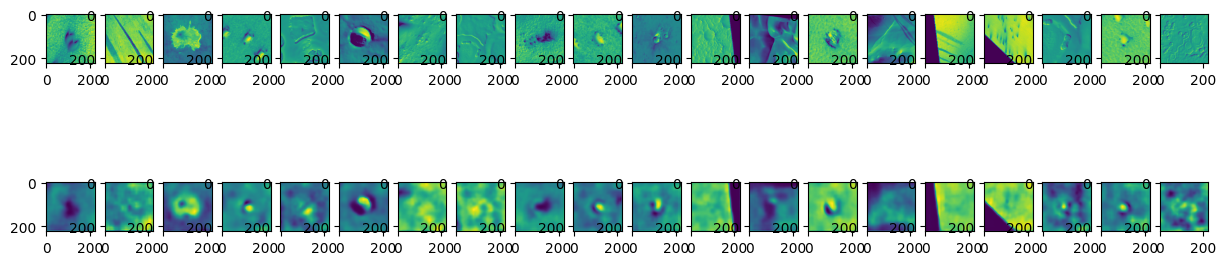

In [43]:
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize = (15,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(224,224))
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(out_images[i].reshape(224,224))
plt.show()

So fantastic results are shown above by creating a convolutional autoencoder now to check on test_set

In [44]:
#test_images = autoencoder.predict(new_test)
#n = 10
#plt.figure(figsize = (15,4))
#for i in range(n):
#    ax = plt.subplot(2, n, i+1)
#    plt.imshow(new_test[i].reshape(224,224))
#    ax = plt.subplot(2, n, i+1+n)
#    plt.imshow(test_images[i].reshape(224,224))
#plt.show()

Very high accuracy, or at least enough to understand and classify the location.

# **Classification Deep NN**

We are going to test it on the variational autoencoder created by the Densely connected AE and the CNN based AE

# **CNN Based NN**

# Encode all the test data

In [45]:
# "Reference" and create seperate encode model
encoder = Model(inputs=input_flattened, outputs=encoded) # Reference above keras api functional model where pool3 was bottleneck layer
#get train data encoded?
encoded_data = encoder.predict(X_train)

167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [46]:
#len(test_df['Class'].unique())

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

#Create a Sequential model
model_9 = Sequential()

# Add a Dense layer with ReLU activation for the hidden layer

model_9.add(Dense(600, activation='relu'))
model_9.add(Dropout(0.2))
model_9.add(BatchNormalization())

model_9.add(Dense(512, activation='relu'))
model_9.add(Dropout(0.2))
model_9.add(BatchNormalization())

model_9.add(Dense(256, activation='relu'))
model_9.add(Dropout(0.25))
model_9.add(BatchNormalization())

model_9.add(Dense(128, activation='relu'))
model_9.add(Dropout(0.2))
model_9.add(BatchNormalization())

model_9.add(Dense(64, activation='relu'))
model_9.add(Dropout(0.2))
model_9.add(BatchNormalization())

# Add a Dense layer with softmax activation for the output layer
model_9.add(Dense(8, activation='softmax'))

# Compile the model
model_9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using the encoded data and the corresponding labels
model_9.fit(encoded_data, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.2811 - loss: 2.0878 - val_accuracy: 0.4981 - val_loss: 1.4558
Epoch 2/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4683 - loss: 1.5071 - val_accuracy: 0.6034 - val_loss: 1.1700
Epoch 3/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5061 - loss: 1.3643 - val_accuracy: 0.5808 - val_loss: 1.1336
Epoch 4/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5539 - loss: 1.2623 - val_accuracy: 0.6212 - val_loss: 1.0731
Epoch 5/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 1.2029 - val_accuracy: 0.6429 - val_loss: 1.0329
Epoch 6/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6088 - loss: 1.1392 - val_accuracy: 0.6560 - val_loss: 1.0184
Epoch 7/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6003 - loss: 1.0987 - val_accuracy: 0.6476 - val_loss: 1.0052
Epoch 8/500
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6333 - loss: 1.0539 - val_a

# Encode the test data

In [80]:
encoded_testdata = encoder.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [81]:
test_predictions = model_9.predict(encoded_testdata)
correct_predictions = np.argmax(test_predictions, axis=1)
#for i in range(len(correct_predictions)):
#  print(correct_predictions[i], y_test[i])

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [82]:
accuracy = np.mean(correct_predictions == y_test)

In [83]:
accuracy

0.7669172932330827

Done